In [84]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import ProbPlot
import scipy as sp
import warnings

In [85]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
warnings.simplefilter('ignore')

In [86]:
df = pd.read_csv('/content/mtcars.csv')
df.shape

(32, 12)

**Dicionário de dados**

- mpg - Milhas por galão, variável target
- cyl - Numero de cilindros do motor
- dis - Deslocamento
- hp - Potencia bruta
- drat - Relação do eixo traseiro
- wt - Peso do veiculo
- qsec - Tempo no 1/4 de milha
- vs - Motor (0 = motor em V, 1 Motor em linha)
- am - Tipo de transmissão (0 = automatica, 1 = manual)
- gear - Numero de marchas
- carb - Numero de carburadores

In [87]:
df.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [88]:
# Renomeia os campos do DATASET

df.columns = ['modelo','mpg', 'cilindros', 'deslocamento','cavalos','relacao','peso_lb','tempo_1.4_milha','motor_em_v'
,'transmissao_automatica','marchas','carburadores']

In [89]:
df.isna().sum()

,0
modelo,0
mpg,0
cilindros,0
deslocamento,0
cavalos,0
relacao,0
peso_lb,0
tempo_1.4_milha,0
motor_em_v,0
transmissao_automatica,0


O dataset esta com as unidades norte americanas de medida, logo, temos que alterar o consumo,
litragem do motor e o peso.

In [90]:
df['km/L'] = df['mpg'] * 0.425144
df['litragem'] = df['deslocamento'] / 61.024
df['peso'] = df['peso_lb'] * 1000 * 0.453592

# Entao podemos tirar as unidades norte americanas
df.drop(['mpg', 'deslocamento', 'peso_lb'], axis=1, inplace=True)


A variavel, motor_em_v está ao contrario, ou seja, 0 para quando é em V e 1 quando não.

In [91]:
df['motor_em_v'] = 1 - df['motor_em_v']
df.head()

,modelo,cilindros,cavalos,relacao,tempo_1.4_milha,motor_em_v,transmissao_automatica,marchas,carburadores,km/L,litragem,peso
0,Mazda RX4,6,110,3.90,16.46,1,1,4,4,8.928024,2.621919,1188.41104
1,Mazda RX4 Wag,6,110,3.90,17.02,1,1,4,4,8.928024,2.621919,1304.07700
2,Datsun 710,4,93,3.85,18.61,0,1,4,1,9.693283,1.769795,1052.33344
3,Hornet 4 Drive,6,110,3.08,19.44,0,0,3,1,9.098082,4.227845,1458.29828
4,Hornet Sportabout,8,175,3.15,17.02,1,0,3,2,7.950193,5.899318,1560.35648


## Comparação de Eficiência por Número de Cilindros (Gráfico de Barras)

Este gráfico compara a média de km por litro para diferentes números de cilindros. A análise mostra que, em geral, carros com menos cilindros tendem a ser mais eficientes em termos de consumo de combustível (maior km/L), enquanto carros com mais cilindros (como 8 cilindros) tendem a ser menos eficientes.

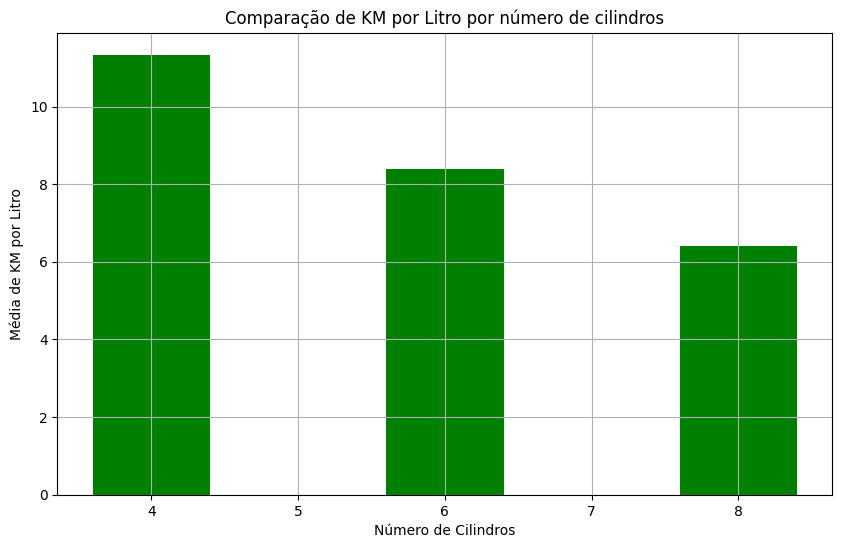

In [92]:
# Comparação de Eficiência por Número de Cilindros (Gráfico de Barras)
plt.figure(figsize=(10,6))
df_grouped_cyl = df.groupby('cilindros')['km/L'].mean().reset_index()
plt.bar(df_grouped_cyl['cilindros'], df_grouped_cyl['km/L'], color='green')
plt.title('Comparação de KM por Litro por número de cilindros')
plt.xlabel('Número de Cilindros')
plt.ylabel('Média de KM por Litro')
plt.grid(True)
plt.show()


## Distribuição da Potência por Tipo de Motor (Gráfico de Barras)

Este gráfico de barras compara a potência (em cavalos) entre motores em V e motores em linha. Motores em V geralmente têm maior potência, enquanto motores em linha são mais comuns em veículos de menor desempenho e mais eficientes. Isso dá uma visão clara de como o tipo de motor está associado ao desempenho do veículo.

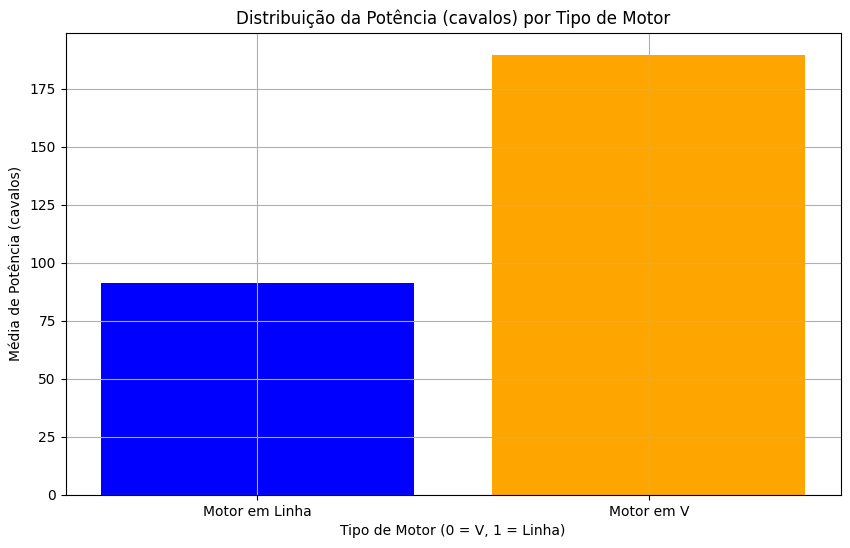

In [93]:
# Distribuição da Potência por Tipo de Motor (Gráfico de Barras)
plt.figure(figsize=(10,6))
df_grouped_hp = df.groupby('motor_em_v')['cavalos'].mean().reset_index()
plt.bar(df_grouped_hp['motor_em_v'], df_grouped_hp['cavalos'], color=['blue', 'orange'])
plt.title('Distribuição da Potência (cavalos) por Tipo de Motor')
plt.xlabel('Tipo de Motor (0 = V, 1 = Linha)')
plt.ylabel('Média de Potência (cavalos)')
plt.xticks([0, 1], ['Motor em Linha', 'Motor em V'])
plt.grid(True)
plt.show()

## Análise Combinada: Transmissão e Tipo de Motor (Gráfico de Barras Empilhadas)

Este gráfico empilhado mostra como a eficiência de combustível (km/L) varia com a combinação de tipo de motor (em V ou em linha) e tipo de transmissão (automática ou manual). A visualização destaca a relação entre a transmissão e o tipo de motor, ajudando a entender qual combinação resulta em maior ou menor eficiência de combustível. Geralmente, motores em linha com transmissão manual tendem a ser mais eficientes, enquanto motores em V com transmissão automática podem ser menos eficientes.

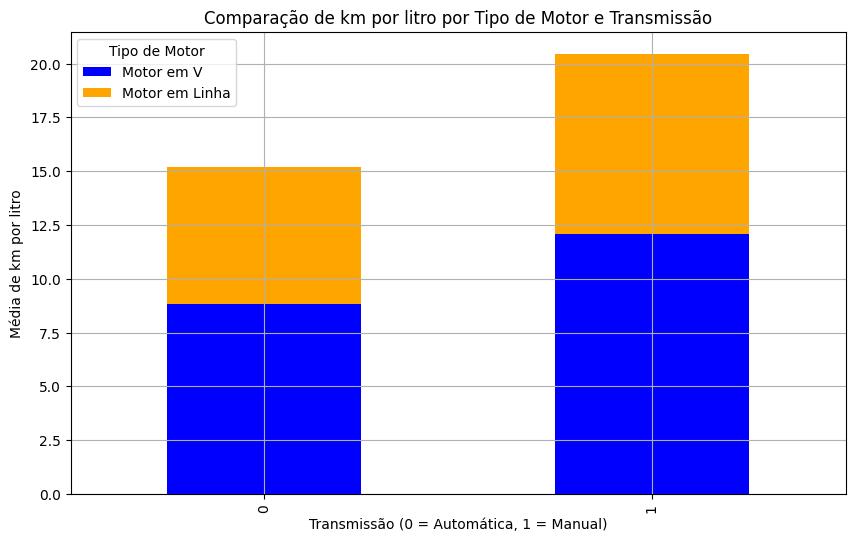

In [94]:
# Análise Combinada: Transmissão e Tipo de Motor (Gráfico de Barras Empilhadas)
df_grouped_am_vs = df.groupby(['transmissao_automatica', 'motor_em_v'])['km/L'].mean().unstack()
df_grouped_am_vs.plot(kind='bar', stacked=True, figsize=(10,6), color=['blue', 'orange'])
plt.title('Comparação de km por litro por Tipo de Motor e Transmissão')
plt.xlabel('Transmissão (0 = Automática, 1 = Manual)')
plt.ylabel('Média de km por litro')
plt.legend(title='Tipo de Motor', labels=['Motor em V', 'Motor em Linha'])
plt.grid(True)
plt.show()

## Comparação Entre dois veiculos com a mesma quantidade de Cilindros e com a diferenciação nos cambios

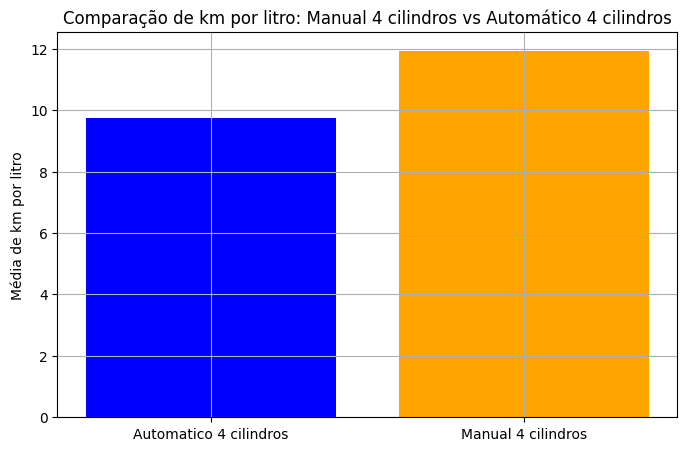

Média de km/L para Automatico 4 cilindros: 9.74
Média de km/L para Manual 4 cilindros: 11.94


In [95]:
# Filtrar os dados para carro manual com 6 cilindros e automático com 4 cilindros
manual_4_cyl = df[(df['transmissao_automatica'] == 0) & (df['cilindros'] == 4)]
automatic_4_cyl = df[(df['transmissao_automatica'] == 1) & (df['cilindros'] == 4)]
# Calcular a média de km por litro para cada filtro
media_manual_4_cyl = manual_4_cyl['km/L'].mean()
media_automatic_4_cyl = automatic_4_cyl['km/L'].mean()
# Criar um gráfico de barras comparando a eficiência de combustível
plt.figure(figsize=(8,5))
plt.bar(['Automatico 4 cilindros', 'Manual 4 cilindros'], [media_manual_4_cyl, media_automatic_4_cyl], color=['blue', 'orange'])
plt.title('Comparação de km por litro: Manual 4 cilindros vs Automático 4 cilindros')
plt.ylabel('Média de km por litro')
plt.grid(True)
plt.show()
# Exibir as médias para referência
print(f"Média de km/L para Automatico 4 cilindros: {media_manual_4_cyl:.2f}")
print(f"Média de km/L para Manual 4 cilindros: {media_automatic_4_cyl:.2f}")

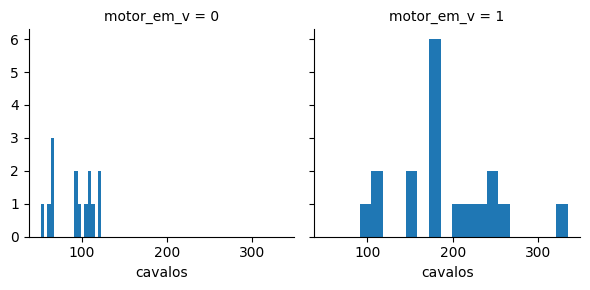

In [96]:
g = sns.FacetGrid(df, col='motor_em_v')
g.map(plt.hist, 'cavalos', bins=18)

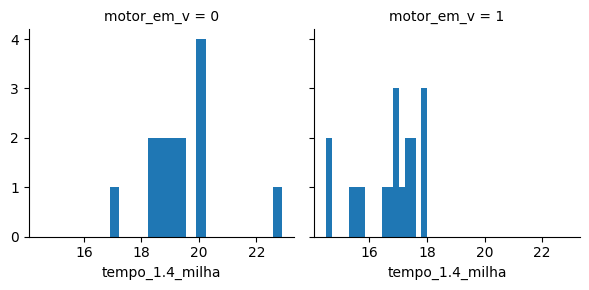

In [97]:
g = sns.FacetGrid(df, col='motor_em_v')
g.map(plt.hist, 'tempo_1.4_milha', bins=18)

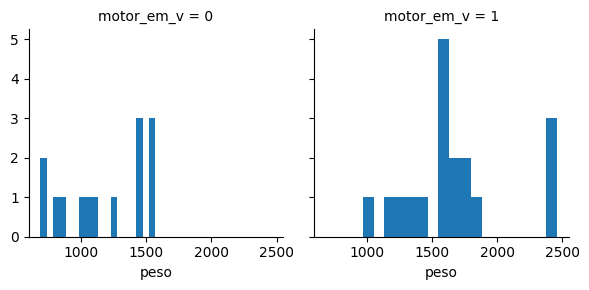

In [98]:
g = sns.FacetGrid(df, col='motor_em_v')
g.map(plt.hist, 'peso', bins=18)

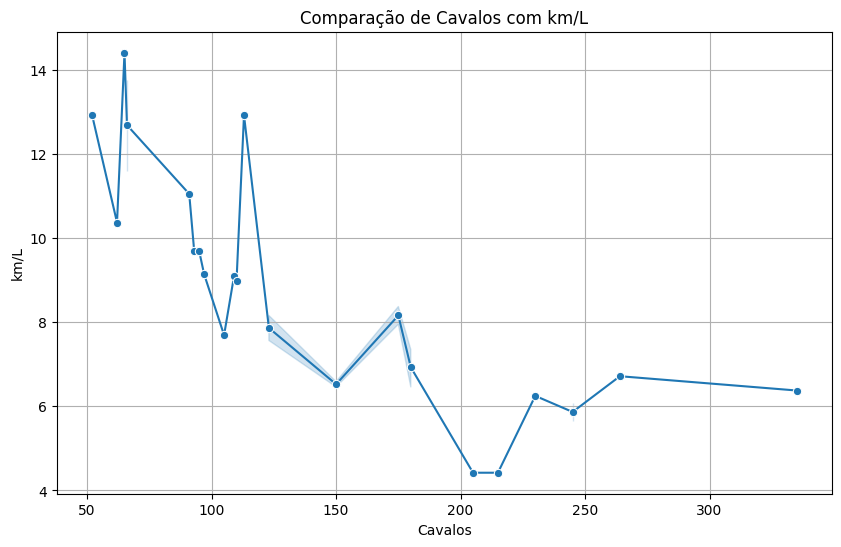

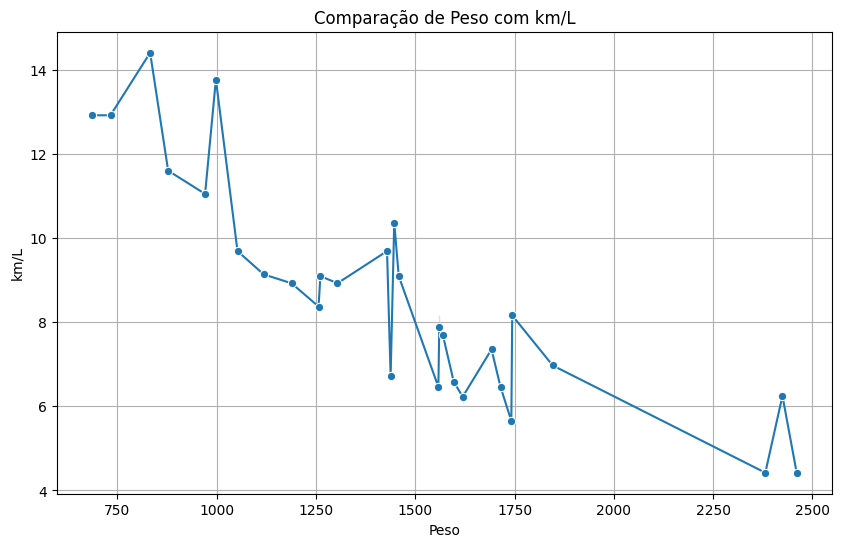

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt
# Gráfico de linhas para comparação de Cavalos com km/L
plt.figure(figsize=(10,6))
sns.lineplot(x='cavalos', y='km/L', data=df, marker='o')
plt.title('Comparação de Cavalos com km/L')
plt.xlabel('Cavalos')
plt.ylabel('km/L')
plt.grid(True)
plt.show()
# Gráfico de linhas para comparação de Peso com km/L
plt.figure(figsize=(10,6))
sns.lineplot(x='peso', y='km/L', data=df, marker='o')
plt.title('Comparação de Peso com km/L')
plt.xlabel('Peso')
plt.ylabel('km/L')
plt.grid(True)
plt.show()

In [100]:
numeric_df = df.select_dtypes(include='number')
numeric_df.corr()

,cilindros,cavalos,relacao,tempo_1.4_milha,motor_em_v,transmissao_automatica,marchas,carburadores,km/L,litragem,peso
cilindros,1.000000,0.832447,-0.699938,-0.591242,0.810812,-0.522607,-0.492687,0.526988,-0.852162,0.902033,0.782496
cavalos,0.832447,1.000000,-0.448759,-0.708223,0.723097,-0.243204,-0.125704,0.749812,-0.776168,0.790949,0.658748
relacao,-0.699938,-0.448759,1.000000,0.091205,-0.440278,0.712711,0.699610,-0.090790,0.681172,-0.710214,-0.712441
tempo_1.4_milha,-0.591242,-0.708223,0.091205,1.000000,-0.744535,-0.229861,-0.212682,-0.656249,0.418684,-0.433698,-0.174716
motor_em_v,0.810812,0.723097,-0.440278,-0.744535,1.000000,-0.168345,-0.206023,0.569607,-0.664039,0.710416,0.554916
transmissao_automatica,-0.522607,-0.243204,0.712711,-0.229861,-0.168345,1.000000,0.794059,0.057534,0.599832,-0.591227,-0.692495
marchas,-0.492687,-0.125704,0.699610,-0.212682,-0.206023,0.794059,1.000000,0.274073,0.480285,-0.555569,-0.583287
carburadores,0.526988,0.749812,-0.090790,-0.656249,0.569607,0.057534,0.274073,1.000000,-0.550925,0.394977,0.427606
km/L,-0.852162,-0.776168,0.681172,0.418684,-0.664039,0.599832,0.480285,-0.550925,1.000000,-0.847551,-0.867659
litragem,0.902033,0.790949,-0.710214,-0.433698,0.710416,-0.591227,-0.555569,0.394977,-0.847551,1.000000,0.887980


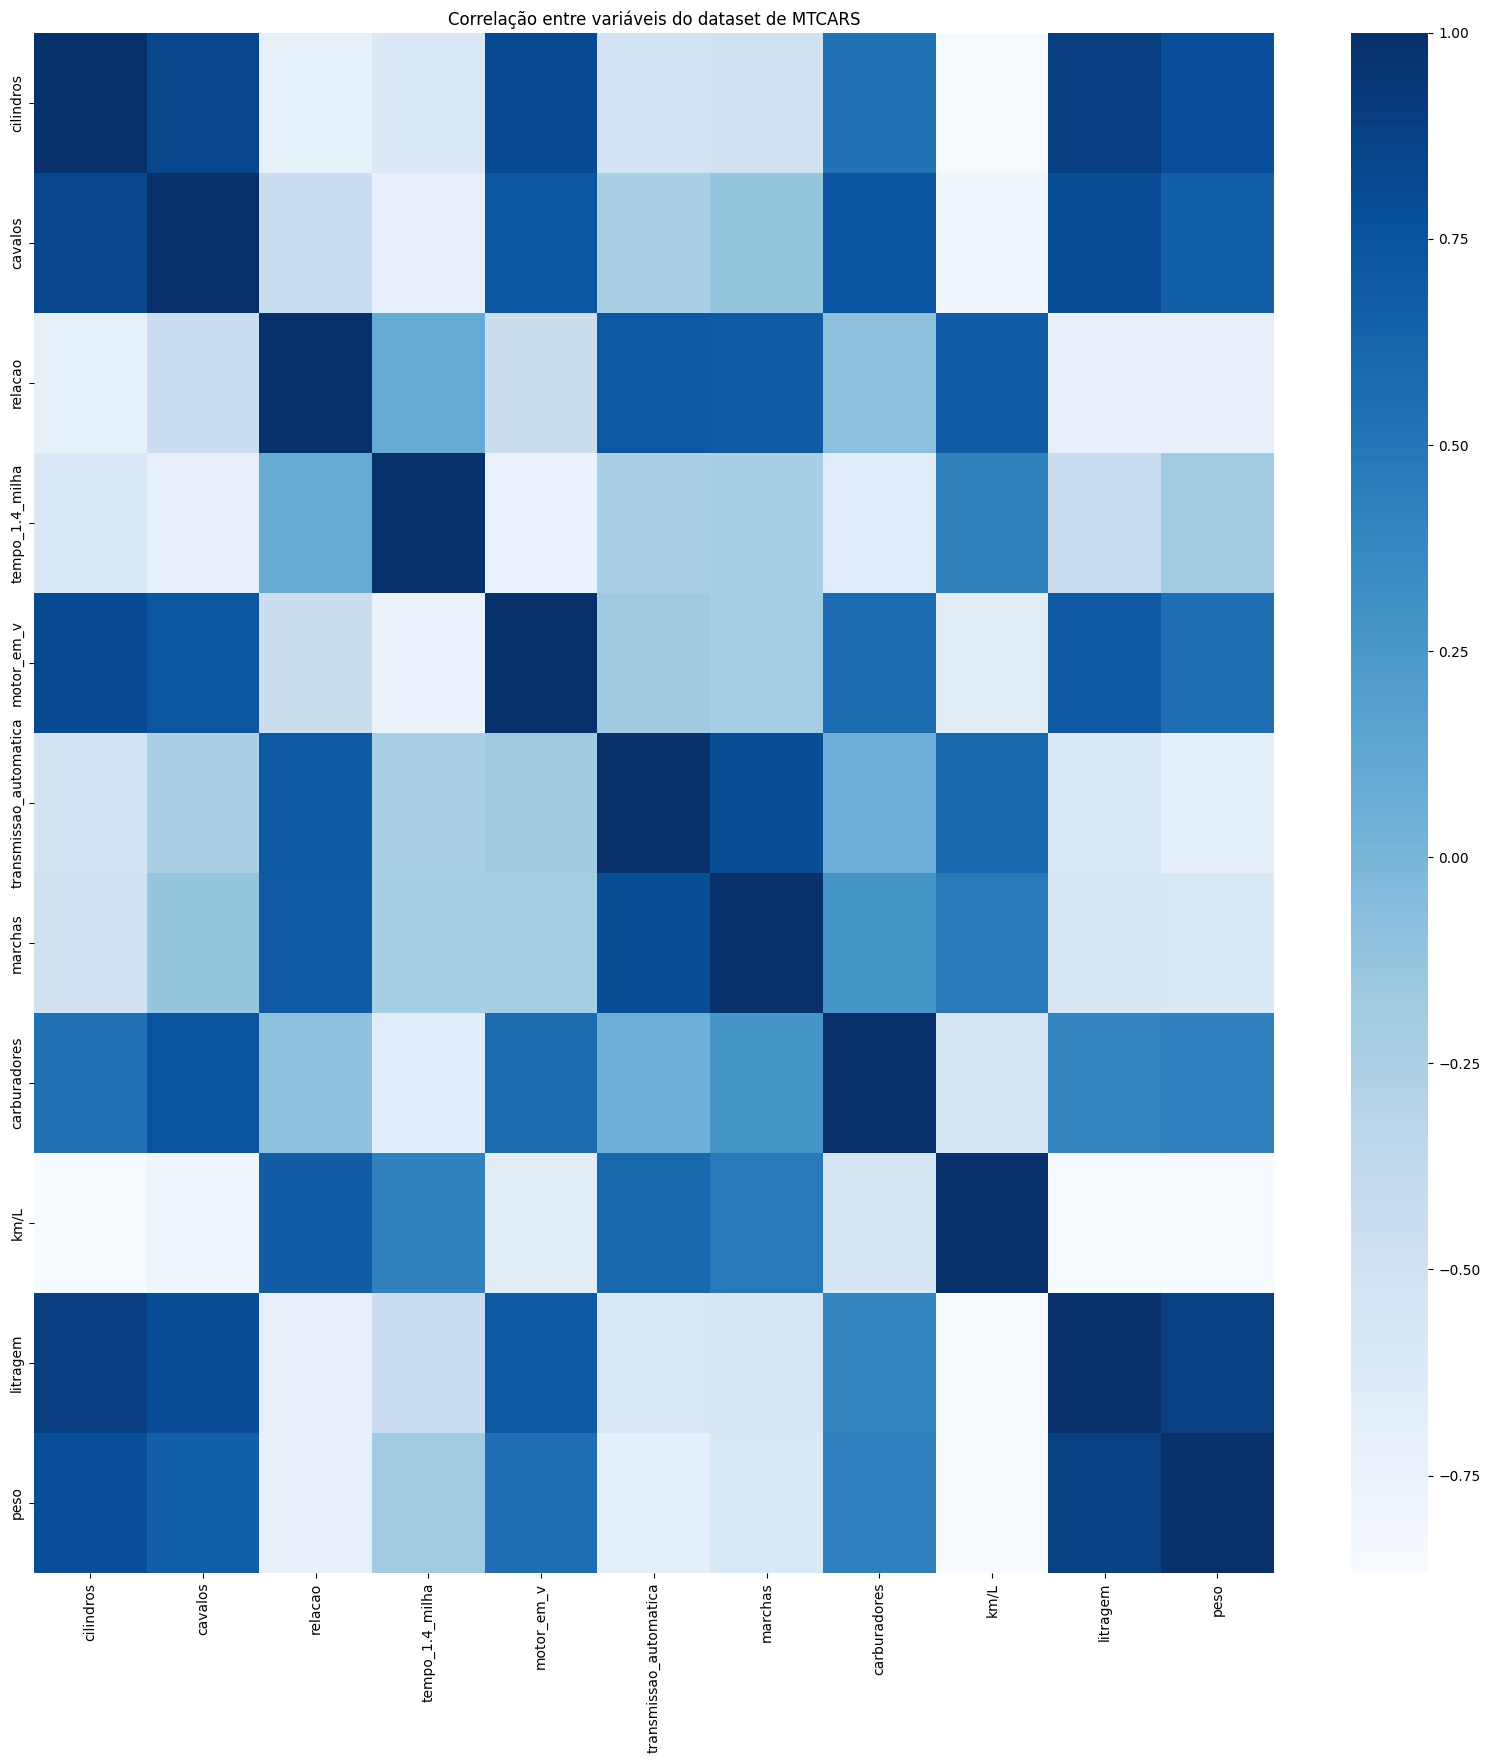

In [101]:
sns.heatmap(numeric_df.corr(),
            annot = False,
            fmt = '.2f',
            cmap='Blues')
plt.title('Correlação entre variáveis do dataset de MTCARS')
plt.show()

## Regressão Linear: Previsão de Eficiência de Combustível

A regressão linear usa as variáveis independentes (número de cilindros, cavalos e tipo de motor) para prever a eficiência de combustível (km/L). O modelo de regressão ajusta uma linha que tenta explicar como essas variáveis afetam a eficiência. O scatter plot visualiza essa relação entre o número de cilindros e o consumo de combustível, com a linha de regressão mostrando a tendência geral.

In [102]:
X = df[['cilindros', 'litragem','cavalos','relacao','peso','tempo_1.4_milha','motor_em_v' ,'transmissao_automatica','marchas','carburadores']]
y = df['km/L']
reg_model = sm.OLS(y, sm.add_constant(X)).fit()
print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   km/L   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     13.93
Date:                Fri, 18 Oct 2024   Prob (F-statistic):           3.79e-07
Time:                        22:01:32   Log-Likelihood:                -42.484
No. Observations:                  32   AIC:                             107.0
Df Residuals:                      21   BIC:                             123.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      5